Questions to be considered:


1. Group the restaurants by cuisines
2. Cuisines types: asian, european, north america, south america, other (cannot classify)
3. EDA for each cuisine



In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/notebooks


In [3]:
biz_file_path = '/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/clean_data/restaurant_open.csv'
biz_att_file_path = '/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/raw_data/yelp_business_attributes.csv'

In [4]:
biz_df = pd.read_csv(biz_file_path)
biz_att = pd.read_csv(biz_att_file_path)

In [5]:
data = pd.merge(biz_df,biz_att, on='business_id')

In [6]:
data.replace(to_replace='True', value = 1,inplace=True)
data.replace(to_replace='False', value = 0,inplace=True)
data.replace(to_replace='Na', value = 0.5,inplace=True) #only treat this as a categorical variable

In [7]:
data.replace(to_replace= ['beer_and_wine',        'casual',          'free',
            'full_bar',          'loud', 'outdoor',         'quiet',           'yes',      'yes_free', '1', '2'], value = 1,inplace=True)
data.replace(to_replace=['no', 'none'], value = 0,inplace=True)

In [8]:
vegas = data[data['city']=='Las Vegas']
vegas.head()

att = vegas.iloc[:,16:]

In [9]:
features = ['Unnamed: 0',
 'business_id',
 'name',
 'neighborhood',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'categories',
 'hours',]

In [10]:
d = att.apply(pd.value_counts)
col_names = d.columns.tolist()

In [11]:
d = d.drop(columns ='HairSpecializesIn_coloring')

In [12]:
col = d.loc[:,~(d == att.shape[0]).any()].columns.tolist()
# d.loc[:,~(d == float(att.shape[0])).any()]

In [13]:
colnames = features + col
dataclean = data[colnames]

In [14]:
vegas_clean = dataclean[dataclean['city']=='Las Vegas']
vegas_clean.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,BusinessAcceptsBitcoin,Open24Hours,BYOB,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed
8,32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,Summerlin,2255 N Rampart Blvd,Las Vegas,NV,89128,36.201794,-115.281981,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9,33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,Summerlin,2227 N Rampart Blvd,Las Vegas,NV,89128,36.201990,-115.283122,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
32,141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,Sunrise,4505 E Bonanza Rd,Las Vegas,NV,89110,36.173140,-115.077945,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
34,143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,Sunrise,"560 N. Nellis Blvd, Ste E1",Las Vegas,NV,89110,36.169353,-115.061694,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
35,145,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,Eastside,3480 S Maryland Pkwy,Las Vegas,NV,89169,36.125934,-115.135253,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [15]:
#Group features by cuisines
asian = 'chinese|japanese|asian|indian|sushi|dim dum|cantonese|ramen|noodles|thai|vietnamese|filipino|korean'
european = 'mediterranean|italian|greek|french|creperies|tapas bars|middle eastern|halal' #remove 'tapas' 
namerica = 'pizza|sandwiches|delis|wraps|chicken wings|chicken shop|hot dogs|cheesesteaks|burgers|american|steak|southern|comfort food|cajun|creole|soul food|fast food'
#remove 'barbeque' since a korean bbq has it and outperforms the class.
samerica = 'mexican|latin american|tex-mex|tacos|salvadoran'
other = asian +'|'+ european +'|'+ namerica +'|'+ samerica
other

'chinese|japanese|asian|indian|sushi|dim dum|cantonese|ramen|noodles|thai|vietnamese|filipino|korean|mediterranean|italian|greek|french|creperies|tapas bars|middle eastern|halal|pizza|sandwiches|delis|wraps|chicken wings|chicken shop|hot dogs|cheesesteaks|burgers|american|steak|southern|comfort food|cajun|creole|soul food|fast food|mexican|latin american|tex-mex|tacos|salvadoran'

In [16]:
only_desc = vegas_clean['categories'].str.lower()

with_features = (vegas_clean
 .assign(asian     = only_desc.str.contains(asian))
 .assign(european = only_desc.str.contains(european))
 .assign(namerica    = only_desc.str.contains(namerica))
 .assign(samerica  = only_desc.str.contains(samerica))
 .assign(other = ~only_desc.str.contains(other)))

with_features['class'] = with_features.iloc[:,-5:].sum(axis = 1)
len(with_features.columns)

71

In [17]:
with_features[with_features['asian']==True].describe()

,Unnamed: 0,latitude,longitude,stars,review_count,is_open,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,...,Open24Hours,BYOB,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,class
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.0,710.000000,710.000000,710.000000,710.000000,...,710.0,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,100284.973239,36.122102,-115.197656,3.704930,298.181690,1.0,0.496479,0.500704,0.174648,0.115493,...,0.5,0.500704,0.500704,0.497887,0.499296,0.497887,0.497887,0.499296,0.502113,1.236620
std,55198.026884,0.053408,0.062516,0.657958,384.157903,0.0,0.041841,0.018765,0.320533,0.246354,...,0.0,0.018765,0.032517,0.032455,0.032517,0.032455,0.032455,0.032517,0.032455,0.441577
min,145.000000,35.995198,-115.334601,1.500000,3.000000,1.0,0.000000,0.500000,0.000000,0.000000,...,0.5,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
25%,50621.000000,36.100515,-115.242993,3.500000,65.250000,1.0,0.500000,0.500000,0.000000,0.000000,...,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
50%,104170.000000,36.125208,-115.197855,4.000000,172.500000,1.0,0.500000,0.500000,0.000000,0.000000,...,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,150273.750000,36.144092,-115.153254,4.000000,398.250000,1.0,0.500000,0.500000,0.500000,0.000000,...,0.5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
max,188497.000000,36.300480,-115.025515,5.000000,3731.000000,1.0,0.500000,1.000000,1.000000,1.000000,...,0.5,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,3.000000


In [18]:
#with_features[with_features['european']==True].describe()
#with_features[with_features['namerica']==True].describe()
#with_features[with_features['samerica']==True].describe()

In [19]:
# business_df['categories'].head()
categories_df = with_features['categories'].str.split(',', expand = True)
cat_ls = categories_df.values.flatten()
cat_ls = list(filter(None, cat_ls)) 
cat_ls = np.unique(cat_ls)

# # clean the words
# leading whitespace 
cat_ls = [s.strip() for s in cat_ls] 
cat_ls = np.unique(cat_ls)
print(len(cat_ls))

387


In [20]:
#Remove the cuisine names from features
cuisine_list = other.split('|')
cuisine_list = [i.title() for i in cuisine_list ]
cat_ls = [i for i in cat_ls if i not in cuisine_list]
print(len(cat_ls))

351


In [21]:
# make empty columns
for i in cat_ls:
    with_features[i] = 0

len(with_features.columns)

422

In [22]:
# sort by largest categories?
cats_df = with_features[with_features.columns[-387:]]

for c in range(0,len(cat_ls)):
  temp_c=str(cats_df.columns.tolist()[c])

  for i in range(len(with_features['categories'])):
    if temp_c in str(with_features['categories'].iloc[i]):
      with_features[temp_c].iloc[i] = 1

with_features.shape

(3779, 422)

In [23]:
vegas_final = with_features.fillna(vegas_clean.mean())
vegas_final['Vegetarian'].describe()

count    3779.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Vegetarian, dtype: float64

In [24]:
vegas_final= vegas_final.rename(columns ={'Unnamed: 0': 'org_index'})
vegas_final= vegas_final.drop(columns =['American (Traditional)', 'American (New)'])

In [25]:
#Check if there is null value
def getDfSummary(input_data):
    output_data=input_data.describe() 
    output_data.loc['number_distinct'] = input_data.nunique() 
    output_data.loc['number_nan'] = input_data.isna().sum()
    output_data=output_data.drop('count', axis=0)
    output_data=output_data.T
    return output_data

getDfSummary(vegas_final)['number_nan'].sum()

0.0

(0, 500)

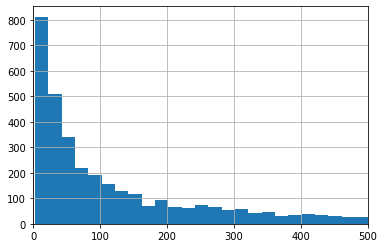

In [26]:
vegas_final['review_count'].hist(bins=400)

plt.xlim(0,500)

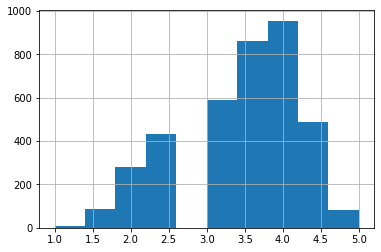

In [27]:
vegas_final['stars'].hist(bins=10)

In [28]:
#Create our target variable, named 'Sucess', Y = 1 if success, and = 0 otherwise
vegas_final['success'] = 0
success_list = vegas_final[(vegas_final['review_count']>100) & (vegas_final['stars']>4)].index.tolist()
vegas_final['success'][success_list] = 1

**EDA by cuisines**


In [29]:
vegas_final.describe()
vegas_final['Vegan'].describe()

count    3779.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Vegan, dtype: float64

In [30]:
vegas_final[vegas_final['Vegan']==1]

,org_index,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,Wholesale Stores,Wholesalers,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wineries,Women's Clothing,Yelp Events,Yoga,success


In [31]:
#Plot to compare the restaurants that have highest ratings (and total review counts) vs. lowest ones for each cuisine
#Introduce the interaction term, 'total_stars' = 'review_count'*'stars'

asian_df = vegas_final[vegas_final['asian']==True]
european_df = vegas_final[vegas_final['european']==True]
namerica_df = vegas_final[vegas_final['namerica']==True]
samerica_df = vegas_final[vegas_final['samerica']==True]
other_df = vegas_final[vegas_final['other']==True]

def plot_totalstars (data):
  fig,ax = plt.subplots(figsize =[6,6])
  data['total_stars'] = data['stars']*data['review_count']
  highstar = data[data['success']==1].sort_values(['total_stars'],ascending=False)
  x = highstar['total_stars'].head(10)
  y = highstar['name'].head(10)
  plt.scatter(x,y)

Text(0.5, 1.0, 'Top 10 Un-classified Restaurants')

<Figure size 432x288 with 0 Axes>

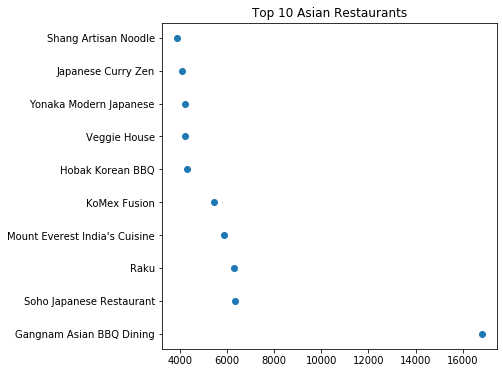

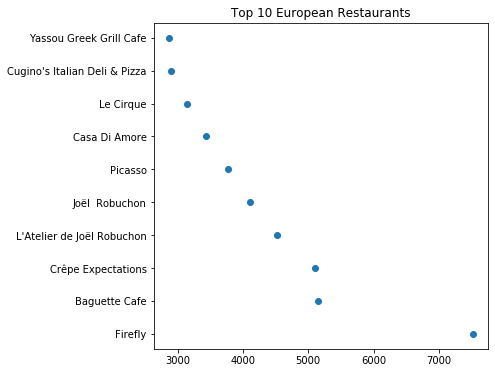

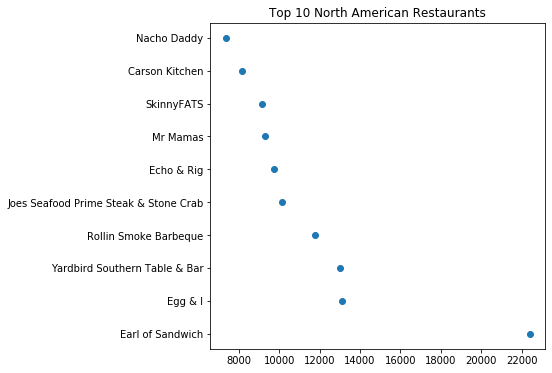

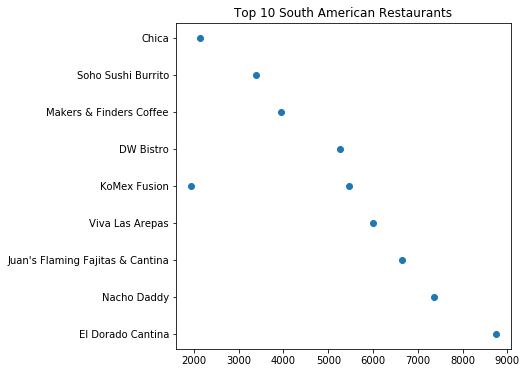

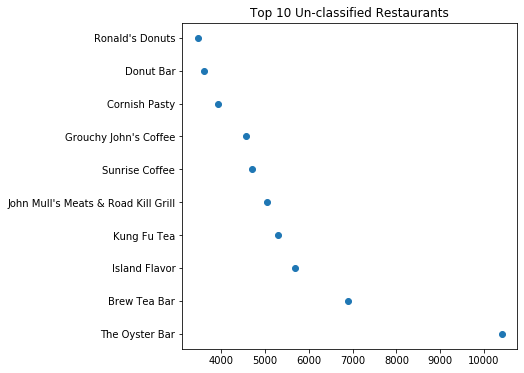

In [32]:
plt.figure(1)
plot_totalstars(asian_df)
plt.title('Top 10 Asian Restaurants')

plt.figure(2)
plot_totalstars(european_df)
plt.title('Top 10 European Restaurants')

plt.figure(3)
plot_totalstars(namerica_df)
plt.title('Top 10 North American Restaurants')

plt.figure(4)
plot_totalstars(samerica_df)
plt.title('Top 10 South American Restaurants')

plt.figure(5)
plot_totalstars(other_df)
plt.title('Top 10 Un-classified Restaurants')

In [33]:
# lowstar = vegas_final[vegas_final['success']==0].sort_values(['total_stars'],ascending=True)
# y2 = lowstar['stars'].head(15)
# x2 = lowstar['name'].head(15)
# plt.scatter(y2,x2)

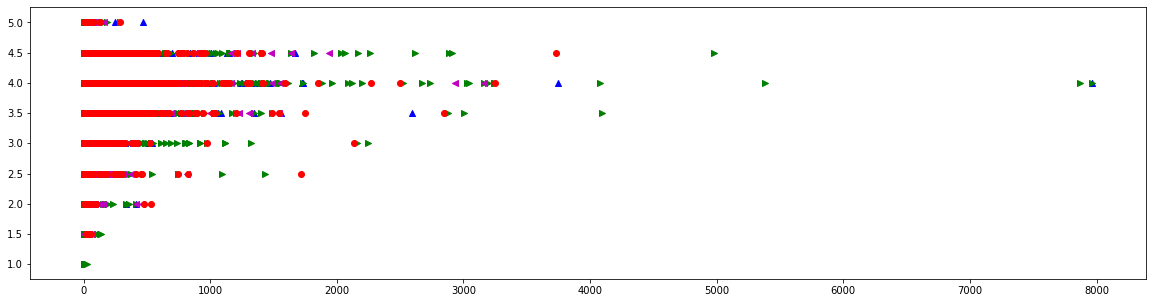

In [34]:
#Plot reviews and stars
fig,ax = plt.subplots(figsize =[20,5])

xA_stars, yA_reviews = vegas_final[vegas_final['asian']==True]['stars'].values, vegas_final[vegas_final['asian']==True]['review_count'].values
xE_stars, yE_reviews = vegas_final[vegas_final['european']==True]['stars'].values, vegas_final[vegas_final['european']==True]['review_count'].values
xNA_stars,yNA_reviews = vegas_final[vegas_final['namerica']==True]['stars'].values, vegas_final[vegas_final['namerica']==True]['review_count'].values
xSA_stars, ySA_reviews = vegas_final[vegas_final['samerica']==True]['stars'].values,vegas_final[vegas_final['samerica']==True]['review_count'].values
xO_stars,yO_reviews = vegas_final[vegas_final['other']==True]['stars'].values, vegas_final[vegas_final['other']==True]['review_count'].values


plt.scatter(yE_reviews,xE_stars, marker='^',color = 'b')
plt.scatter(yNA_reviews,xNA_stars, marker='>',color = 'g')
plt.scatter(ySA_reviews,xSA_stars, marker='<',color = 'm')
plt.scatter(yA_reviews, xA_stars,color = 'r')

# plt.bar(yE_reviews,xE_stars,color = 'b')
# plt.bar(yNA_reviews,xNA_stars,color = 'g')
# plt.bar(ySA_reviews,xSA_stars,color = 'm')
# plt.bar(yA_reviews, xA_stars,color = 'r')

# for i, txt in enumerate(z_name):
#   if (y_reviews.iloc[i]>2500 and x_stars.iloc[i]>=4.0):
#     plt.annotate(txt, (y_reviews.iloc[i], x_stars.iloc[i]),xytext=(-5, 10), textcoords='offset points',ha = 'left',va='bottom', rotation=45 )

Text(0.5, 1.0, 'Number of restaurants grouped by cuisine')

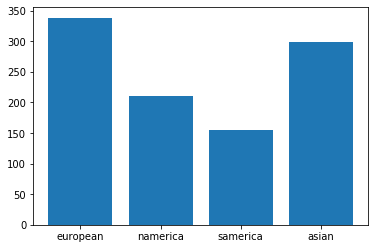

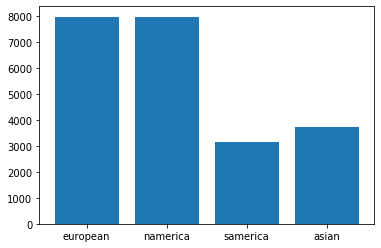

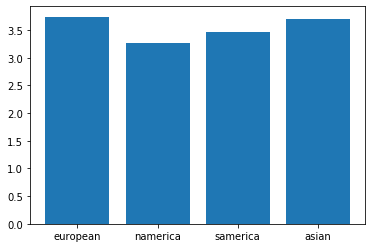

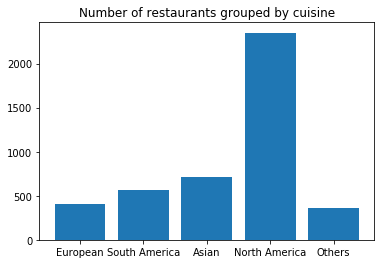

In [35]:
plt.figure(1)
x = ['european','namerica','samerica','asian']
y = [yE_reviews.mean(), yNA_reviews.mean(),ySA_reviews.mean(),yA_reviews.mean()]
plt.bar(x,y)


plt.figure(2)
y2 = [yE_reviews.max(), yNA_reviews.max(),ySA_reviews.max(),yA_reviews.max()]
plt.bar(x,y2)


plt.figure(3)
y3 = [xE_stars.mean(), xNA_stars.mean(), xSA_stars.mean(), xA_stars.mean()]
plt.bar(x,y3)


plt.figure(4)
x = ['European','South America','Asian','North America','Others']
y4 = [len(yE_reviews),len(ySA_reviews),len(yA_reviews),len(yNA_reviews), len(yO_reviews)]
plt.bar(x,y4)
plt.title('Number of restaurants grouped by cuisine')

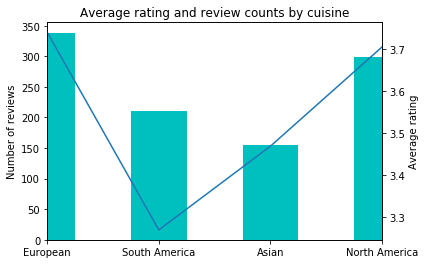

In [36]:
x = ['European','South America','Asian','North America']
df = pd.DataFrame([x,y,y3]).T

df[1].plot(kind ='bar',color ='c')
plt.ylabel('Number of reviews')
df[2].plot(secondary_y=True)
plt.ylabel('Average rating')
# plt.title('Restaurants grouped by cuisine')
plt.xticks(np.arange(4), x)
plt.title('Average rating and review counts by cuisine')

plt.show()

<BarContainer object of 5 artists>

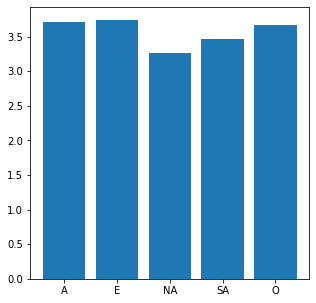

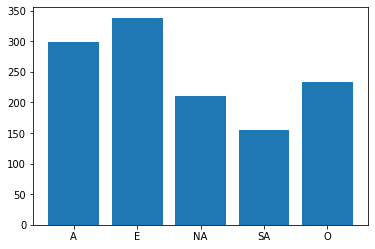

In [37]:
#Compare average stars and reviews per cuisine group
fig = plt.subplots(figsize =[5,5])

x = [xA_stars.mean(), xE_stars.mean(),xNA_stars.mean(), xSA_stars.mean(), xO_stars.mean()]
y = [yA_reviews.mean(),yE_reviews.mean(), yNA_reviews.mean(), ySA_reviews.mean(), yO_reviews.mean()]
z = ['A','E','NA','SA','O']
plt.figure(1)
plt.bar(z,x)
plt.figure(2)
plt.bar(z,y)

In [38]:
vegas_final.replace(0.5, 0, inplace=True)

#Export clean data to csv
vegas_final.to_csv('/Users/lisacombs/Documents/FALL2019/INTRO_DS/Project/clean_data/vegas_cuisine.csv')

In [39]:
vegas_final.head(5)

,org_index,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,Wholesale Stores,Wholesalers,Windshield Installation & Repair,Wine & Spirits,Wine Bars,Wineries,Women's Clothing,Yelp Events,Yoga,success
8,32,kgffcoxT6BQp-gJ-UQ7Czw,Subway,Summerlin,2255 N Rampart Blvd,Las Vegas,NV,89128,36.201794,-115.281981,...,0,0,0,0,0,0,0,0,0,0
9,33,0jtRI7hVMpQHpUVtUy4ITw,Omelet House Summerlin,Summerlin,2227 N Rampart Blvd,Las Vegas,NV,89128,36.201990,-115.283122,...,0,0,0,0,0,0,0,0,0,0
32,141,zhxnD7J5_sCrKSw5cwI9dQ,Popeyes Louisiana Kitchen,Sunrise,4505 E Bonanza Rd,Las Vegas,NV,89110,36.173140,-115.077945,...,0,0,0,0,0,0,0,0,0,0
34,143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,Sunrise,"560 N. Nellis Blvd, Ste E1",Las Vegas,NV,89110,36.169353,-115.061694,...,0,0,0,0,0,0,0,0,0,0
35,145,6llKs7K_tn8ChXcIM-oTvg,Sansei Japan,Eastside,3480 S Maryland Pkwy,Las Vegas,NV,89169,36.125934,-115.135253,...,0,0,0,0,0,0,0,0,0,0
